Let's see if the repos we created are balanced 

In [25]:
import pandas as pd
df_chinese_repos = pd.read_csv('Chinese_repos.csv')
df_american_repos = pd.read_csv('USA_repos.csv')

First the general numbers

In [26]:
for location, df in [('Chinese', df_chinese_repos), ('USA', df_american_repos)]:
    print(f"For {location}:")
    print("number of users:")
    print(df['author'].unique().size)
    print("number of repos:")
    print(df.shape[0])
    print("sum of size of repos:")
    print(df['size'].sum())

For Chinese:
number of users:
312
number of repos:
921
sum of size of repos:
51787729.0
For USA:
number of users:
277
number of repos:
850
sum of size of repos:
45252771.0


Now let's take a deeper look into the data: first: number of repos with size (1Mb as a bin)

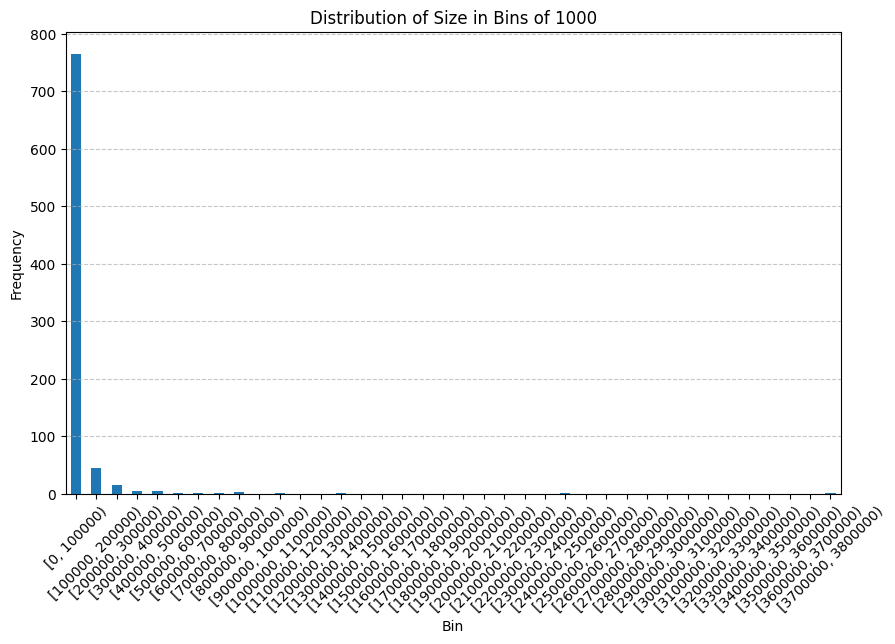

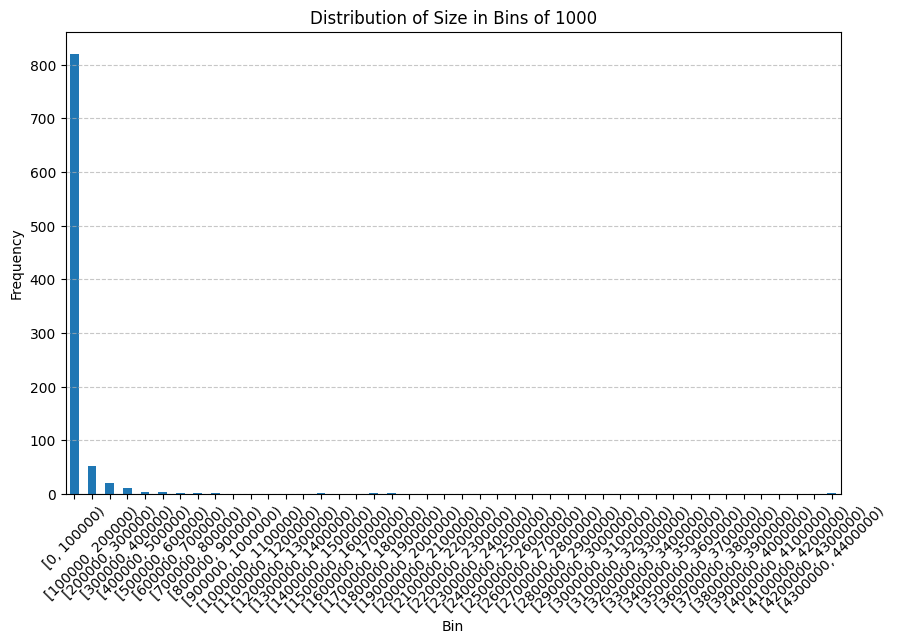

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
def print_size_distribution(df, bin_size=100000):
    df['size'] = df['size'].astype(int)
    
    # Create bins using pd.cut() and count the occurrences in each bin
    size_bins = pd.cut(df['size'], bins=range(0, df['size'].max() + bin_size, bin_size), right=False)
    bin_counts = size_bins.value_counts().sort_index()
    
    # Plotting the bar chart
    bin_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('Distribution of Size in Bins of 1000')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
for df in [df_american_repos, df_chinese_repos]:
    print_size_distribution(df)

So we can consider getting rid of projects that is bigger than 400 MB

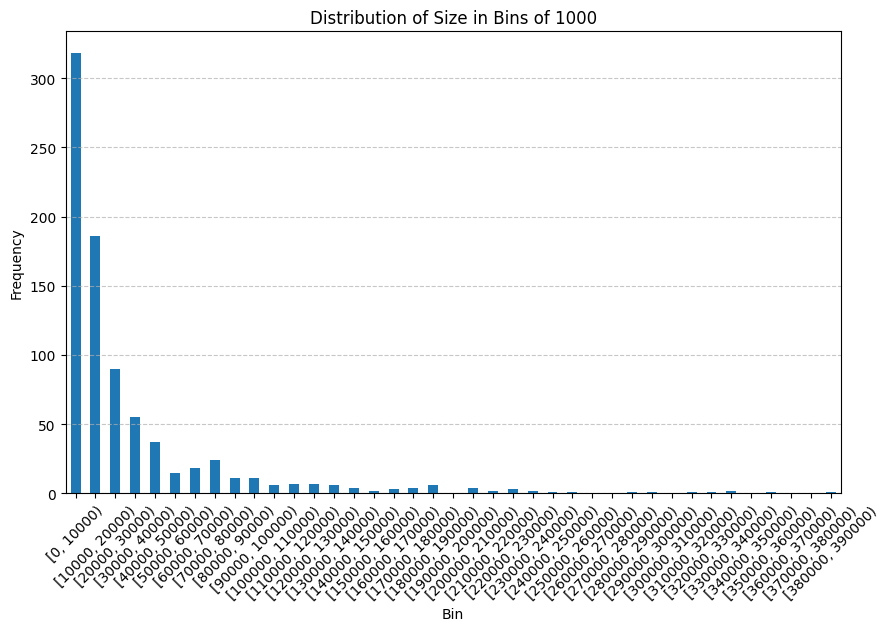

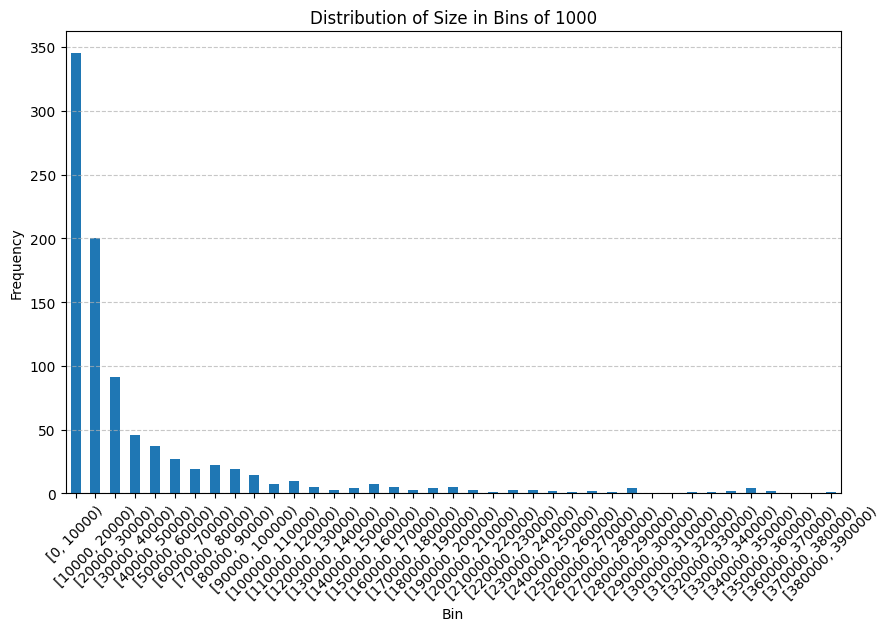

In [28]:
for df in [df_american_repos, df_chinese_repos]:
    df_drop_large = df[df['size'] < 400000].copy()
    print_size_distribution(df_drop_large, bin_size=10000)

Seems about the same distribution, so we need to check again if the number of users (and other stats) is affected: and it seems like nothing is really affected

In [29]:
# original
for location, df in [('Chinese', df_chinese_repos), ('USA', df_american_repos)]:
    print(f"For {location}:")
    print("number of users:")
    print(df['author'].unique().size)
    print("number of repos:")
    print(df.shape[0])
    print("sum of size of repos:")
    print(df['size'].sum())

df_chinese_repos = df_chinese_repos[df_chinese_repos['size'] < 400000]
df_american_repos = df_american_repos[df_american_repos['size'] < 400000]


for location, df in [('Chinese', df_chinese_repos), ('USA', df_american_repos)]:
    print(f"For {location}:")
    print("number of users:")
    print(df['author'].unique().size)
    print("number of repos:")
    print(df.shape[0])
    print("sum of size of repos:")
    print(df['size'].sum())

For Chinese:
number of users:
312
number of repos:
921
sum of size of repos:
51787729
For USA:
number of users:
277
number of repos:
850
sum of size of repos:
45252771
For Chinese:
number of users:
309
number of repos:
904
sum of size of repos:
33848721
For USA:
number of users:
275
number of repos:
831
sum of size of repos:
27685555


So we will save our results

In [30]:
df_chinese_repos.to_csv('Chinese_trim_repos.csv', index=False)
df_american_repos.to_csv('USA_trim_repos.csv', index=False)